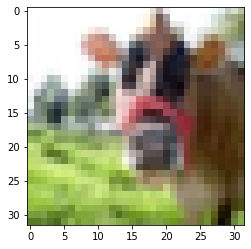

[19]


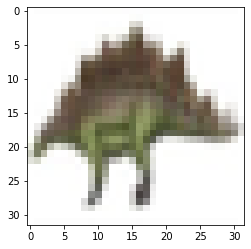

[29]


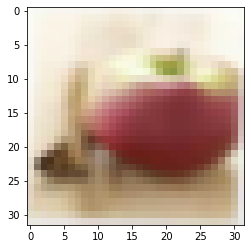

[0]


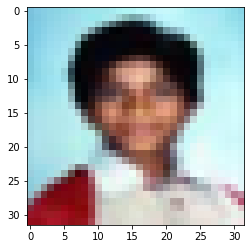

[11]


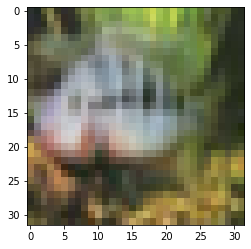

[1]


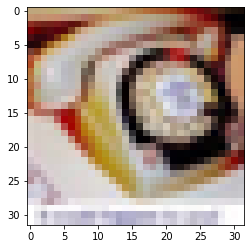

[86]


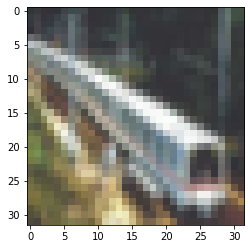

[90]


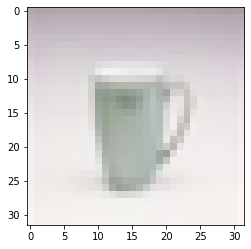

[28]


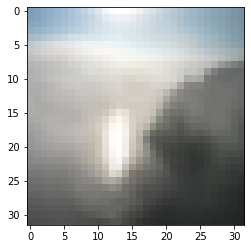

[23]


In [3]:
from tensorflow.keras.datasets import cifar100
import matplotlib.pyplot as plt
from tensorflow.keras.utils import to_categorical
from keras.layers import Dense, Activation, Dropout, Flatten
from tensorflow.keras.optimizers import RMSprop, Adam, SGD
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
from keras.models import Sequential
from skimage import color
from keras.utils import np_utils

(x_train, y_train),(x_test,y_test) = cifar100.load_data()
x = x_test
for i in range (9):
    plt.imshow(x_train[i])
    plt.show()
    print(y_train[i])

In [4]:
#chuyen hinh anh ve mau gray 
x_train = color.rgb2gray(x_train)
y_train = color.rgb2gray(y_train)
x_test = color.rgb2gray(x_test)
y_test = color.rgb2gray(y_test)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: The behavior of rgb2gray will change in scikit-image 0.19. Currently, rgb2gray allows 2D grayscale image to be passed as inputs and leaves them unmodified as outputs. Starting from version 0.19, 2D arrays will be treated as 1D images with 3 channels.
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: FutureWarning: The behavior of rgb2gray will change in scikit-image 0.19. Currently, rgb2gray allows 2D grayscale image to be passed as inputs and leaves them unmodified as outputs. Starting from version 0.19, 2D arrays will be treated as 1D images with 3 channels.
  """


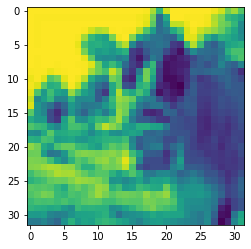

[19]


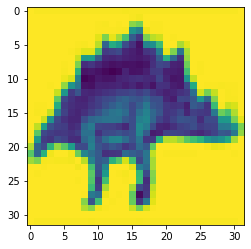

[29]


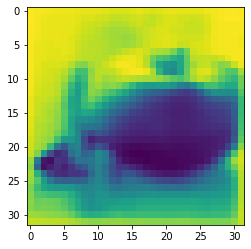

[0]


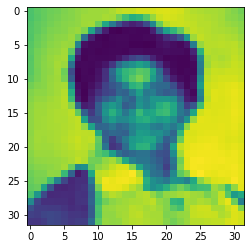

[11]


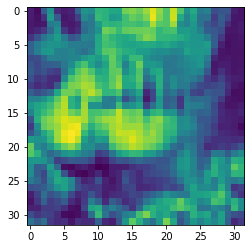

[1]


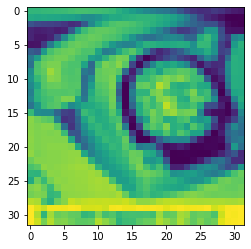

[86]


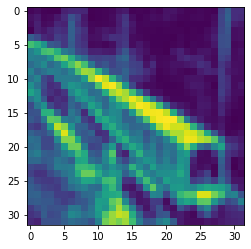

[90]


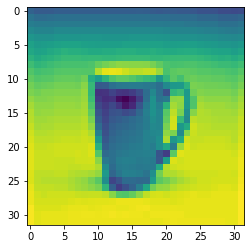

[28]


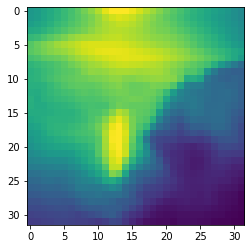

[23]


In [6]:
for i in range (9):
    plt.imshow(x_train[i])
    plt.show()
    print(y_train[i])

In [7]:
x_train = x_train.reshape(50000,1024) 
x_test = x_test.reshape(10000,1024)
# Normalize inputs from 0-255 to 0-1
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train/= 255 
x_test/= 255

In [8]:
y_train = np_utils.to_categorical(y_train,100)
y_test = np_utils.to_categorical(y_test,100)

In [9]:
# Tạo Model
model = Sequential()

# model ANN
# input
model.add(Dense(512,activation='relu',input_shape = (1024,)))
model.add(Dropout(0.2))
# 1
model.add(Dense(256,activation='relu'))
model.add(Dropout(0.2))
# 2
model.add(Dense(256,activation='relu'))
model.add(Dropout(0.2))
# output
model.add(Dense(100,activation='softmax'))
model.add(Dropout(0.1))


In [12]:
model.summary()
model.compile( loss='categorical_crossentropy', optimizer = Adam(), metrics = ['accuracy']) 
history = model.fit(x_train, y_train, batch_size = 128, epochs = 200, verbose = 1, validation_data = (x_test, y_test))

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               524800    
                                                                 
 dropout (Dropout)           (None, 512)               0         
                                                                 
 dense_1 (Dense)             (None, 256)               131328    
                                                                 
 dropout_1 (Dropout)         (None, 256)               0         
                                                                 
 dense_2 (Dense)             (None, 256)               65792     
                                                                 
 dropout_2 (Dropout)         (None, 256)               0         
                                                                 
 dense_3 (Dense)             (None, 100)               2

In [13]:
score=model.evaluate(x_test,y_test,verbose=1)
print('Test loss =',score[0])
print('Test accuracy =',score[1])

313/313 [==============================] - 1s 3ms/step - loss: 3.6612 - accuracy: 0.1772
Test loss = 3.6611785888671875
Test accuracy = 0.17720000445842743


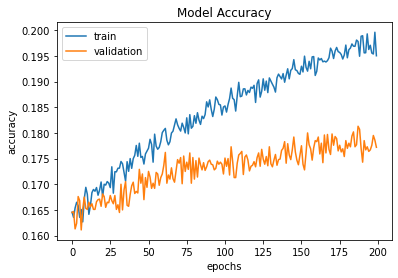

In [14]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epochs')
plt.legend(['train','validation'],loc='upper left')

In [15]:
y_predict = model.predict(x_test)

# Tạo một index và dự đoán 
random_index = np.random.choice(len(x_test))
x_sample = x_test[random_index]
y_true = np.argmax(y_test, axis = 1)
y_sample_true = y_true[random_index]
y_sample_classes = y_predict[random_index]

In [16]:
Label = ['apple', 'aquarium_fish', 'baby', 'bear','beaver', 'bed', 'bee', 'beetle', 'bicycle', 'bottle','bowl', 'boy', 
'bridge', 'bus', 'butterfly', 'camel','can', 'castle', 'caterpillar', 'cattle', 'chair','chimpanzee', 'clock', 
'cloud', 'cockroach', 'couch','crab', 'crocodile', 'cup', 'dinosaur', 'dolphin','elephant', 'flatfish', 'forest', 'fox', 'girl', 'hamster',
'house', 'kangaroo', 'keyboard', 'lamp','lawn_mower', 'leopard', 'lion', 'lizard', 'lobster',
'man', 'maple_tree', 'motorcycle', 'mountain','mouse', 'mushroom', 'oak_tree', 'orange', 'orchid',
'otter', 'palm_tree', 'pear', 'pickup_truck','pine_tree', 'plain', 'plate', 'poppy', 'porcupine',
'possum', 'rabbit', 'raccoon', 'ray', 'road', 'rocket','rose', 'sea', 'seal', 'shark', 'shrew', 'skunk',
'skyscraper', 'snail', 'snake', 'spider', 'squirrel','streetcar', 'sunflower', 'sweet_pepper', 'table',
'tank', 'telephone', 'television', 'tiger', 'tractor','train', 'trout', 'tulip', 'turtle', 'wardrobe', 'whale',
'willow_tree', 'wolf', 'woman', 'worm']

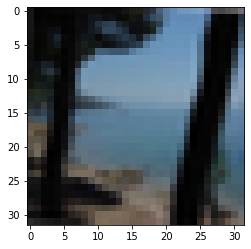

wardrobe


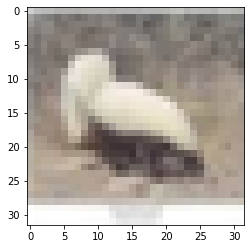

pickup_truck


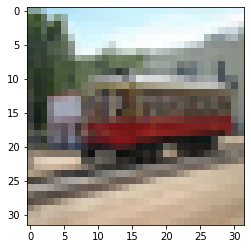

pickup_truck


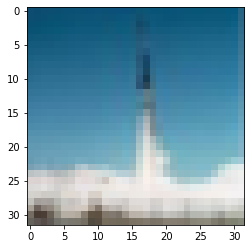

rocket


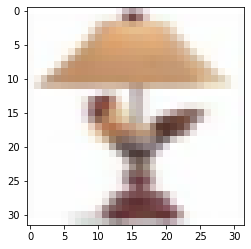

lamp


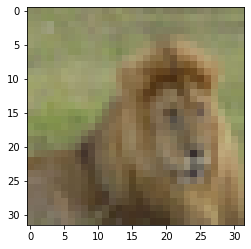

dolphin


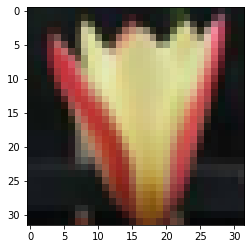

rose


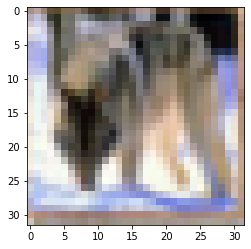

woman


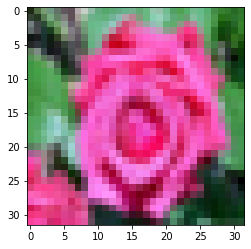

dolphin


In [22]:
for i in range(9):
    plt.imshow(x[i+10])
    plt.show()
    #print(np.round(y_predict[i]))
    print(Label[np.argmax(y_predict[i+10])])

In [ ]:
model.save('cifar100(ANN).h5')